In [4]:
using Pkg
Pkg.add("OpenQuantumTools")
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
Pkg.add("OrdinaryDiffEq")

   Resolving package versions...
    Updating `C:\Users\Pranavi\.julia\environments\v1.10\Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.74.1
  No Changes to `C:\Users\Pranavi\.julia\environments\v1.10\Manifest.toml`


In [ ]:
using Pkg
Pkg.update()
Pkg.status()

## Tutorial - solve the time-independent Lindblad equation using HOQST

In [5]:
using OpenQuantumTools, OrdinaryDiffEq, Plots

# define the Hamiltonian
H = DenseHamiltonian([(s)->1.0], [σz], unit=:ħ)
# define the initial state
u0 = PauliVec[1][1]*PauliVec[1][1]'
# define the Lindblad operator
# the rate and Lindblad operator can also be time-dependent functions
lind = Lindblad(0.1, σz)
# combine them into an Annealing object
annealing = Annealing(H, u0, interactions = InteractionSet(lind))

Annealing with DenseHamiltonian{ComplexF64, true} and u0 Matrix{ComplexF64}
u0 size: (2, 2)

In [6]:
# define total annealing/evolution time
tf = 10
# solve the Lindblad equation
sol = solve_lindblad(annealing, 10, alg=Tsit5());

In [8]:
t_axis = range(0, 10, length=100)
bloch_vector = []
for t in t_axis
    # matrix_decompose projects a matrix onto a list of basis elements
    push!(bloch_vector, 2*real.(matrix_decompose(sol(t), [σx, σy, σz])))
end

off_diag = []
for t in t_axis
    push!(off_diag, abs(sol(t)[1,2]))
end

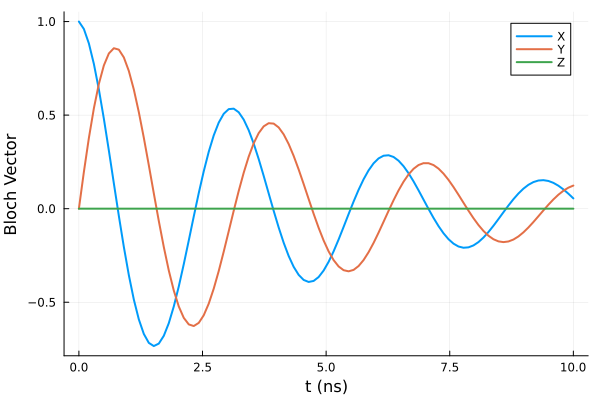

In [9]:
plot(t_axis, [c[1] for c in bloch_vector], label="X", linewidth=2)
plot!(t_axis, [c[2] for c in bloch_vector], label="Y", linewidth=2)
plot!(t_axis, [c[3] for c in bloch_vector], label="Z", linewidth=2)
xlabel!("t (ns)")
ylabel!("Bloch Vector")